# Data Collection

In the data collection I chose the UNSW-NB15 dataset a network traffic dataset this dataset include a blend of modern normal activities and synthetic contemporary attack behaviors including nine attack categories such as Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode, and Worms it provides a rich set of feature suitable for training and evaluate network intrusion detection systems.

In [1]:
import pandas as pd

training_file_path = 'UNSW_NB15_training-set.parquet'
testing_file_path = 'UNSW_NB15_testing-set.parquet'

# Read the parquet file
training_df = pd.read_parquet(training_file_path)
testing_df = pd.read_parquet(testing_file_path)

In [2]:
# Print the first five rows of the training dataset
print("Training Dataset:")
display(training_df.head())

# Print information about the training dataset
print("\nTraining Dataset Information:")
display(training_df.info())

# Print the first five rows of the testing dataset
print("\nTesting Dataset:")
display(testing_df.head())

# Print information about the testing dataset
print("\nTesting Dataset Information:")
display(testing_df.info())

Training Dataset:


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087486,14158.942383,...,0,0,1,1,0,0,0,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473373,8395.112305,...,0,0,1,1,0,0,0,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1572.271851,...,0,0,1,1,0,0,0,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,2740.178955,...,0,0,1,1,1,1,0,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,8561.499023,...,0,0,2,1,0,0,0,0,Normal,0



Training Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   dur                175341 non-null  float32 
 1   proto              175341 non-null  category
 2   service            175341 non-null  category
 3   state              175341 non-null  category
 4   spkts              175341 non-null  int16   
 5   dpkts              175341 non-null  int16   
 6   sbytes             175341 non-null  int32   
 7   dbytes             175341 non-null  int32   
 8   rate               175341 non-null  float32 
 9   sload              175341 non-null  float32 
 10  dload              175341 non-null  float32 
 11  sloss              175341 non-null  int16   
 12  dloss              175341 non-null  int16   
 13  sinpkt             175341 non-null  float32 
 14  dinpkt             175341 non-null  float32 
 15  sji

None


Testing Dataset:


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.09375,180363632.0,...,0,0,1,1,0,0,0,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.00000,881000000.0,...,0,0,1,1,0,0,0,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.00000,854400000.0,...,0,0,1,1,0,0,0,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.65625,600000000.0,...,0,0,2,1,0,0,0,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.00000,850400000.0,...,0,0,2,1,0,0,0,0,Normal,0



Testing Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   dur                82332 non-null  float32 
 1   proto              82332 non-null  category
 2   service            82332 non-null  category
 3   state              82332 non-null  category
 4   spkts              82332 non-null  int16   
 5   dpkts              82332 non-null  int16   
 6   sbytes             82332 non-null  int32   
 7   dbytes             82332 non-null  int32   
 8   rate               82332 non-null  float32 
 9   sload              82332 non-null  float32 
 10  dload              82332 non-null  float32 
 11  sloss              82332 non-null  int16   
 12  dloss              82332 non-null  int16   
 13  sinpkt             82332 non-null  float32 
 14  dinpkt             82332 non-null  float32 
 15  sjit               8233

None

# Data Preprocessing:

* Clean the dataset by handling missing values, removing duplicates  and normalizing the data.
* Perform feature engineering to create new features that may improve model performance.

## Handle Missing Values

In [7]:
# Handle missing values for numeric and non numeric columns separately

# Numeric columns
numeric_cols = training_df.select_dtypes(include=['float64', 'int64']).columns

# Fill numeric columns with mean
training_df[numeric_cols] = training_df[numeric_cols].fillna(training_df[numeric_cols].mean())
testing_df[numeric_cols] = testing_df[numeric_cols].fillna(testing_df[numeric_cols].mean())

# Non numeric columns
non_numeric_cols = training_df.select_dtypes(exclude=['float64', 'int64']).columns

# Fill non numeric columns with mode most frequent value
for col in non_numeric_cols:
    training_df[col] = training_df[col].fillna(training_df[col].mode()[0])
    testing_df[col] = testing_df[col].fillna(testing_df[col].mode()[0])

# Print there are no missing values
print("Missing values in Training Data after handling:")
print(training_df.isnull().sum())

print("\nMissing values in Testing Data after handling:")
print(testing_df.isnull().sum())

Missing values in Training Data after handling:
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int64

Missing values in Testing Data after handling:
dur                  0
proto                0
service          

## Remove Duplicates

In [10]:
# Remove duplicates in the datasets
training_df = training_df.drop_duplicates()
testing_df = testing_df.drop_duplicates()

## Normalize the Data

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for normalization
numerical_columns = training_df.select_dtypes(include=['float64', 'int64']).columns

# Apply MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical column only
scaled_training_data = pd.DataFrame(
    scaler.fit_transform(training_df[numerical_columns]),
    columns=numerical_columns,
    index=training_df.index
)

scaled_testing_data = pd.DataFrame(
    scaler.transform(testing_df[numerical_columns]),
    columns=numerical_columns,
    index=testing_df.index
)

# Replace numerical columns in the original DataFrame with scaled data
training_df[numerical_columns] = scaled_training_data
testing_df[numerical_columns] = scaled_testing_data

## Feature Engineering

**Ratio of Source Packets to Destination Packets**

In [17]:
# Adding a new feature Source to Destination Packet Ratio
training_df['pkt_ratio'] = training_df['spkts'] / (training_df['dpkts'] + 1)
testing_df['pkt_ratio'] = testing_df['spkts'] / (testing_df['dpkts'] + 1)

**Total Bytes**

In [20]:
# Adding a new feature Total Bytes
training_df['total_bytes'] = training_df['sbytes'] + training_df['dbytes']
testing_df['total_bytes'] = testing_df['sbytes'] + testing_df['dbytes']

## Data After Preprocessing

In [23]:
# Check the dataset after preprocessing
print("\nTraining Data after preprocessing:")
training_df.head()


Training Data after preprocessing:


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label,pkt_ratio,total_bytes
0,0.121478,tcp,-,FIN,6,4,258,172,74.087486,14158.942383,...,1,1,0,0,0,0,Normal,0,1.200000,430
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473373,8395.112305,...,1,1,0,0,0,0,Normal,0,0.358974,42748
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1572.271851,...,1,1,0,0,0,0,Normal,0,0.470588,13550
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,2740.178955,...,1,1,1,1,0,0,Normal,0,0.923077,1398
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,8561.499023,...,2,1,0,0,0,0,Normal,0,1.428571,802


In [25]:
print("\nTesting Data after preprocessing:")
testing_df.head()


Testing Data after preprocessing:


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label,pkt_ratio,total_bytes
0,0.000011,udp,-,INT,2,0,496,0,90909.09375,180363632.0,...,1,1,0,0,0,0,Normal,0,2.0,496
1,0.000008,udp,-,INT,2,0,1762,0,125000.00000,881000000.0,...,1,1,0,0,0,0,Normal,0,2.0,1762
2,0.000005,udp,-,INT,2,0,1068,0,200000.00000,854400000.0,...,1,1,0,0,0,0,Normal,0,2.0,1068
3,0.000006,udp,-,INT,2,0,900,0,166666.65625,600000000.0,...,2,1,0,0,0,0,Normal,0,2.0,900
4,0.000010,udp,-,INT,2,0,2126,0,100000.00000,850400000.0,...,2,1,0,0,0,0,Normal,0,2.0,2126


# Session 3 EDA

* Conduct EDA to understand the dataset identify patterns and visualize the data.

* Used advanced visualization techniques such as heatmaps pair plots and correlation matrices

## Import Libraries

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# To display plots inline
%matplotlib inline

## Dataset Overview

In [32]:
# Display basic info about the dataset
print("Dataset Overview:")
print(training_df.info())
print("\nBasic Statistics:")
print(training_df.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 96822 entries, 0 to 175337
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   dur                96822 non-null  float32 
 1   proto              96822 non-null  category
 2   service            96822 non-null  category
 3   state              96822 non-null  category
 4   spkts              96822 non-null  int16   
 5   dpkts              96822 non-null  int16   
 6   sbytes             96822 non-null  int32   
 7   dbytes             96822 non-null  int32   
 8   rate               96822 non-null  float32 
 9   sload              96822 non-null  float32 
 10  dload              96822 non-null  float32 
 11  sloss              96822 non-null  int16   
 12  dloss              96822 non-null  int16   
 13  sinpkt             96822 non-null  float32 
 14  dinpkt             96822 non-null  float32 
 15  sjit               96822 non-null  floa

## Target Variable Distribution

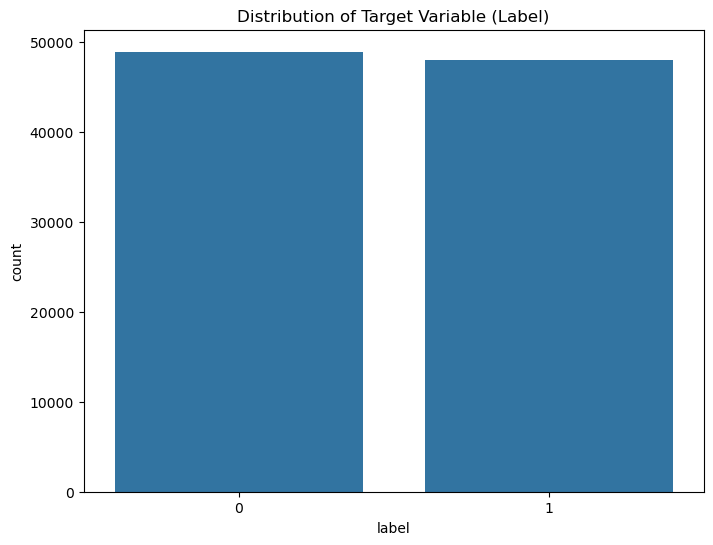

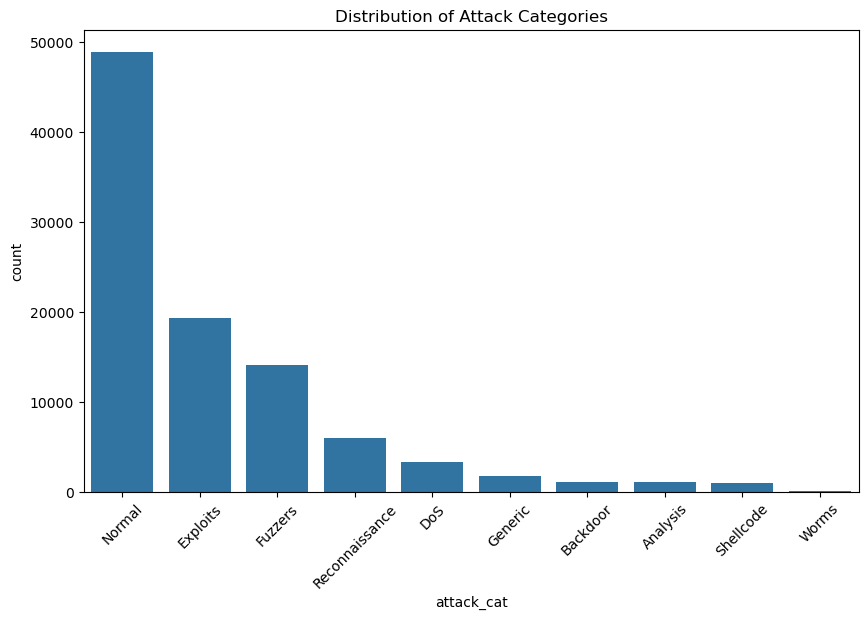

In [35]:
# Distribution of the Label Binary Target
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=training_df)
plt.title('Distribution of Target Variable (Label)')
plt.show()

# Distribution of Attack Categories
plt.figure(figsize=(10, 6))
sns.countplot(x='attack_cat', data=training_df, order=training_df['attack_cat'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Attack Categories')
plt.show()

## Correlation Heatmap

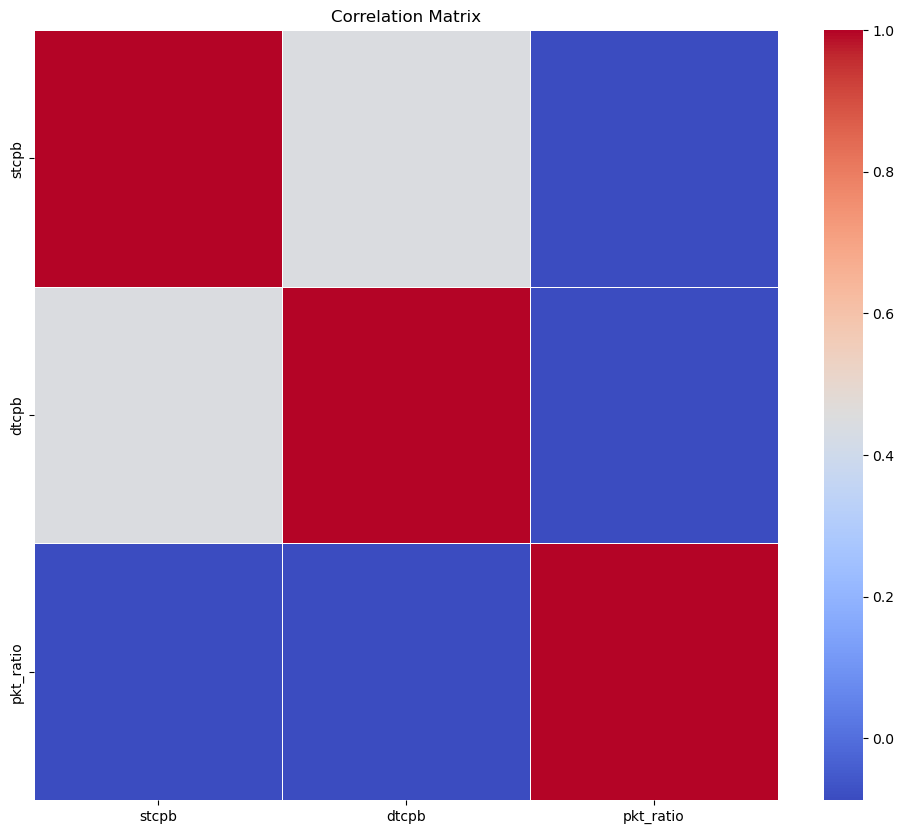

In [85]:
# Select only numerical column
numerical_columns = training_df.select_dtypes(include=['float64', 'int64']).columns
numerical_df = training_df[numerical_columns]

# Calculate the correlation matrix
correlation = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Pair Plot for Selected Features

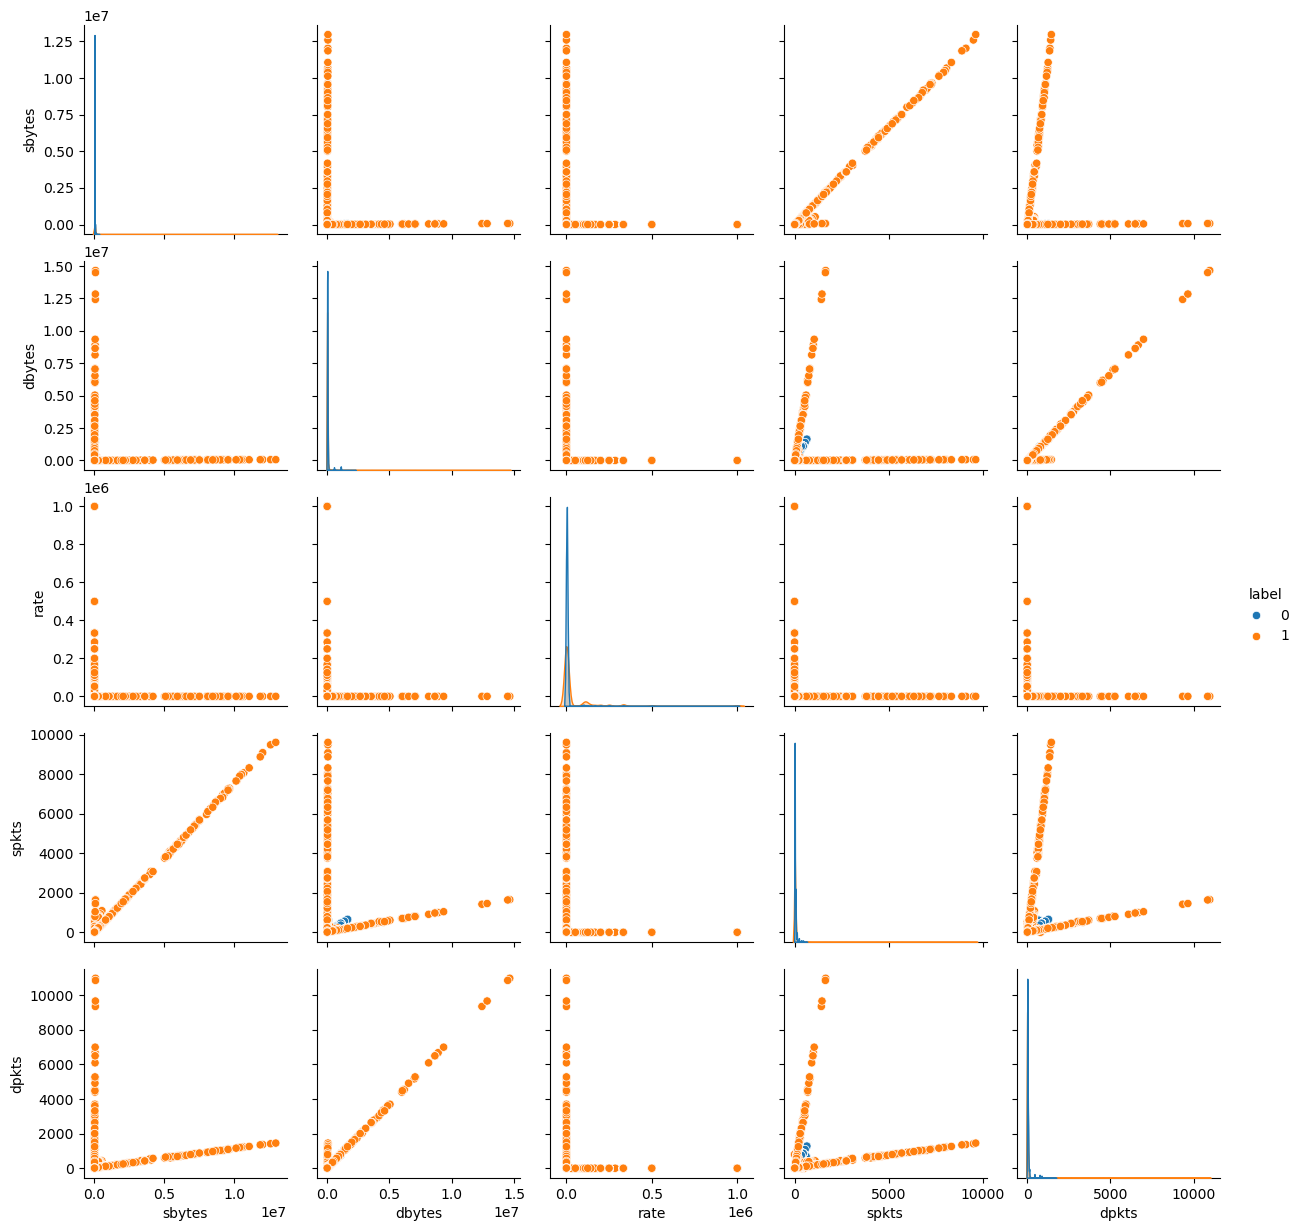

In [63]:
# Pair plot for selected numerical columns
sample_columns = ['sbytes', 'dbytes', 'rate', 'spkts', 'dpkts', 'label']
sns.pairplot(training_df[sample_columns], hue='label', diag_kind='kde')
plt.show()

## Feature Distributions

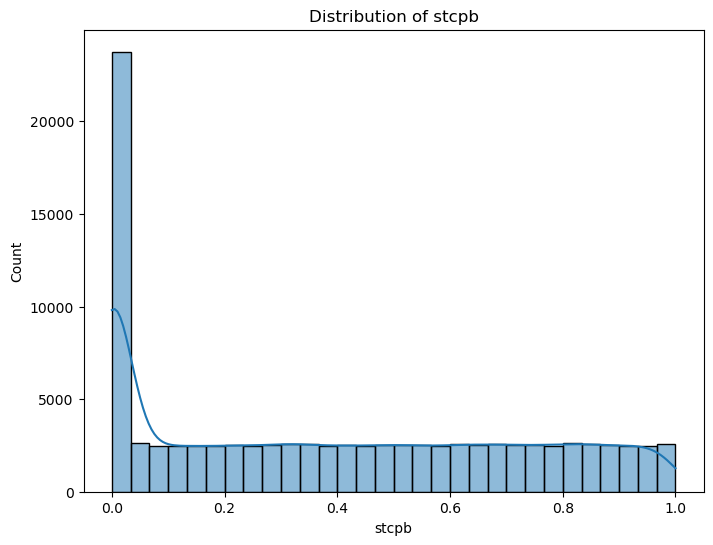

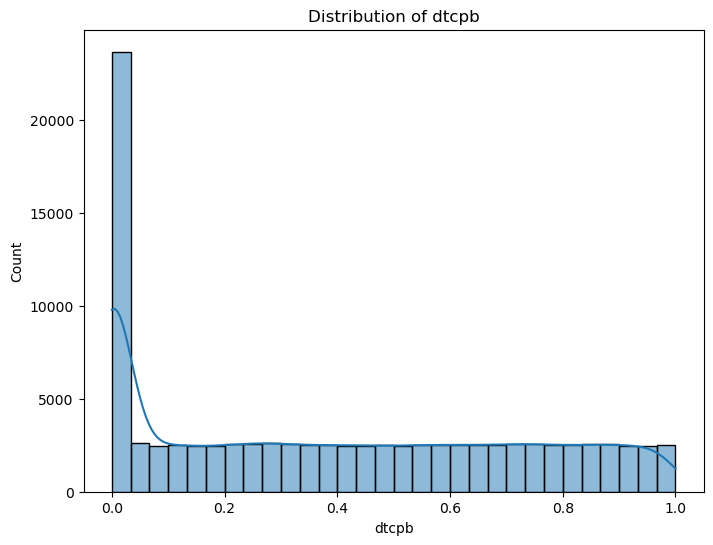

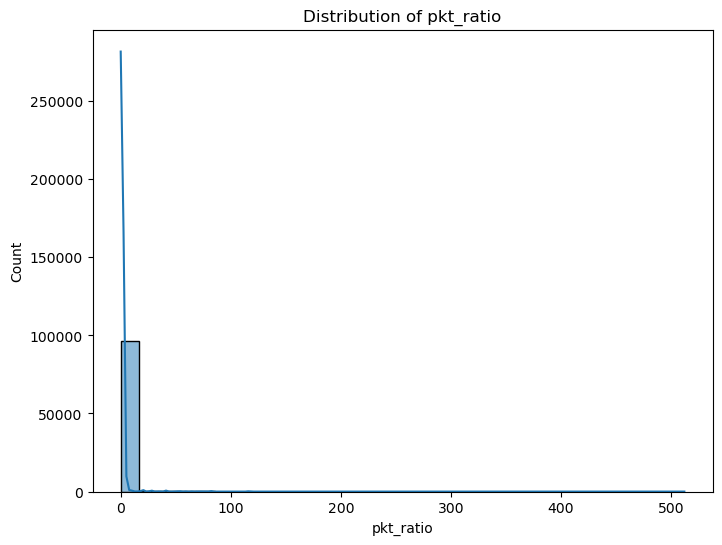

In [65]:
# Distribution of Numerical Features
numerical_columns = training_df.select_dtypes(include=['float64', 'int64']).columns

# Plot first 6 features
for col in numerical_columns[:6]:  
    plt.figure(figsize=(8, 6))
    sns.histplot(training_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

## Boxplots for Numeric Features by Label

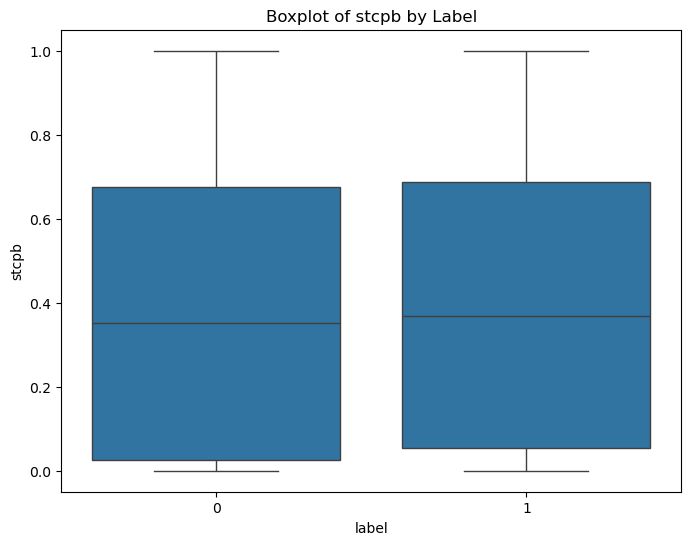

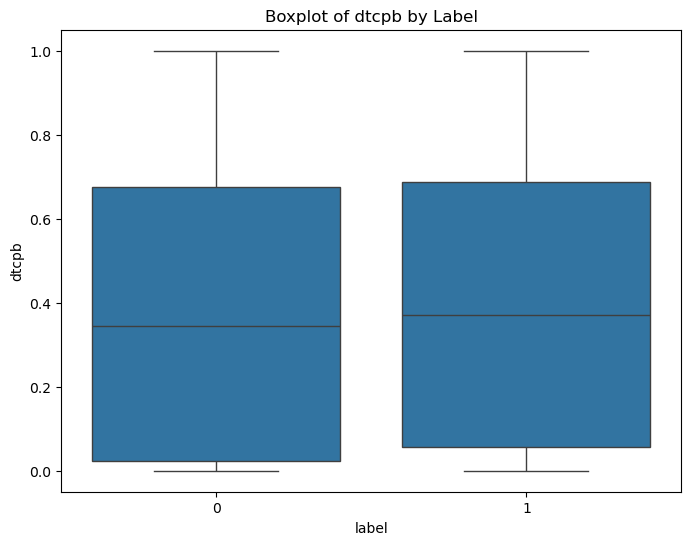

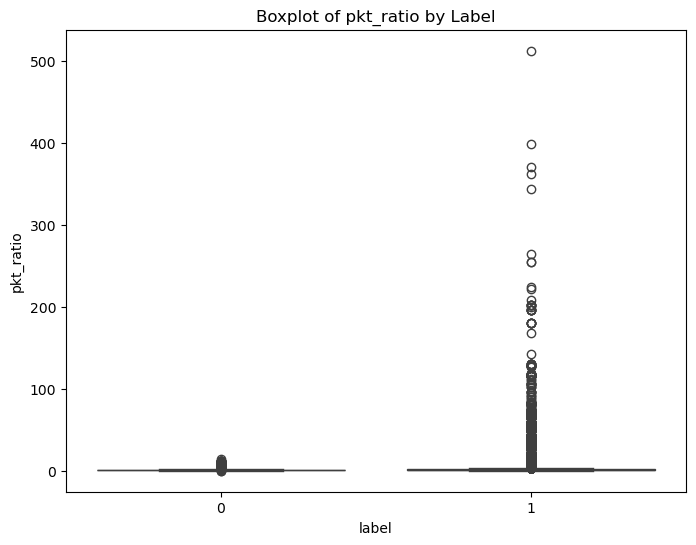

In [67]:
# Boxplots of numerical features grouped by label
# Plot first 6 features
for col in numerical_columns[:6]:  
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='label', y=col, data=training_df)
    plt.title(f'Boxplot of {col} by Label')
    plt.show()

## Violin Plots for Features by Attack Category

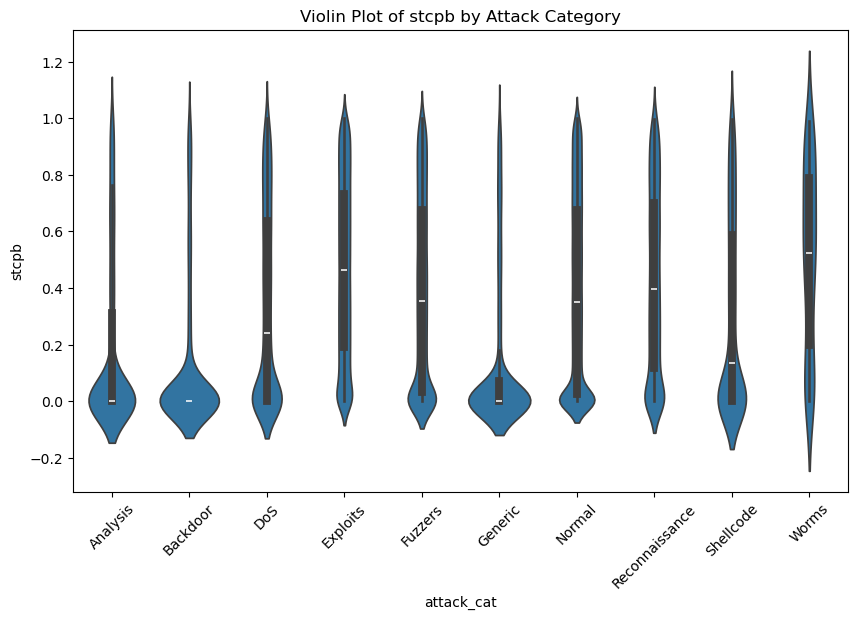

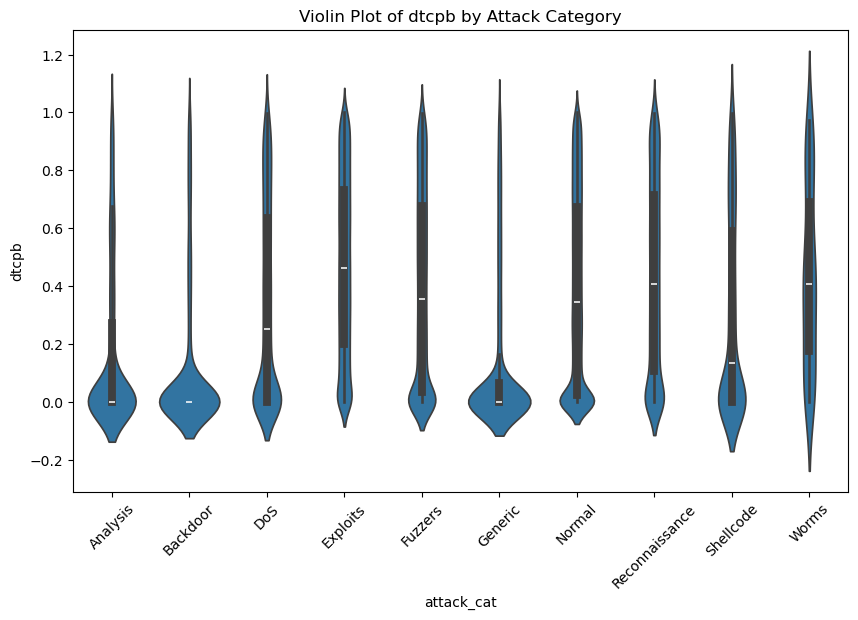

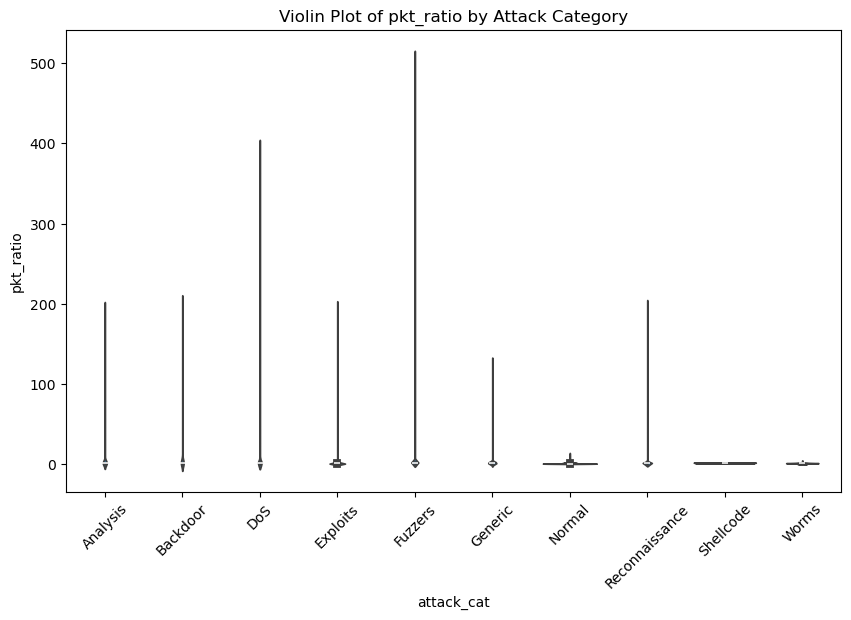

In [69]:
# Violin plots for numerical features grouped by attack_cat
 # Plot first 10 features
for col in numerical_columns[:10]: 
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='attack_cat', y=col, data=training_df)
    plt.title(f'Violin Plot of {col} by Attack Category')
    plt.xticks(rotation=45)
    plt.show()

## Scatter Plots

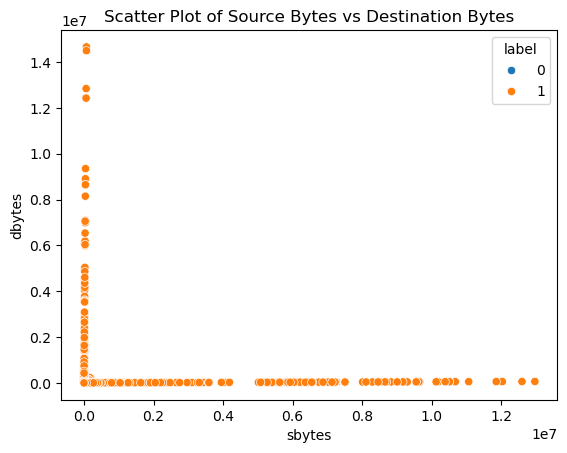

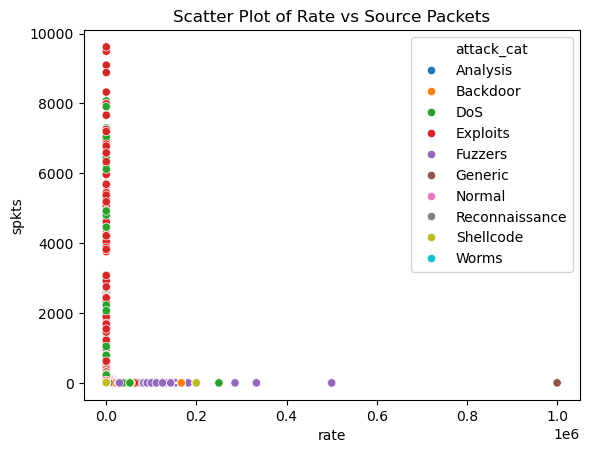

In [71]:
# Scatter plot for relationship between important features
sns.scatterplot(x='sbytes', y='dbytes', hue='label', data=training_df)
plt.title('Scatter Plot of Source Bytes vs Destination Bytes')
plt.show()

sns.scatterplot(x='rate', y='spkts', hue='attack_cat', data=training_df)
plt.title('Scatter Plot of Rate vs Source Packets')
plt.show()

## Advanced Correlation Analysis

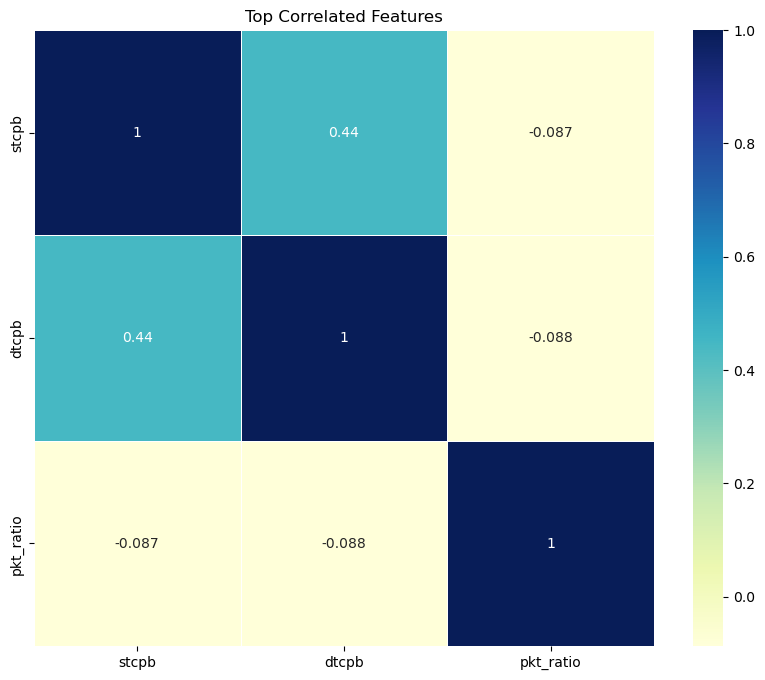

In [83]:
# Compute the correlation matrix for numerical column
numerical_columns = training_df.select_dtypes(include=['float64', 'int64']).columns
numerical_df = training_df[numerical_columns]

correlation = numerical_df.corr()

# Pairwise Correlation for top 10 correlated features
top_corr_pairs = (
    correlation.abs()
    .unstack()
    .sort_values(kind="quicksort", ascending=False)
    .drop_duplicates()
    .head(10)
    .index
)

# Extract unique feature name from the pairs
unique_features = set([feature for pair in top_corr_pairs for feature in pair])

# Create a heatmap for the top correlated feature
plt.figure(figsize=(10, 8))
sns.heatmap(
    numerical_df[list(unique_features)].corr(),
    annot=True,
    cmap="YlGnBu",
    linewidths=0.5,
)
plt.title("Top Correlated Features")
plt.show()

## Pair Grid Plot for Selected Features

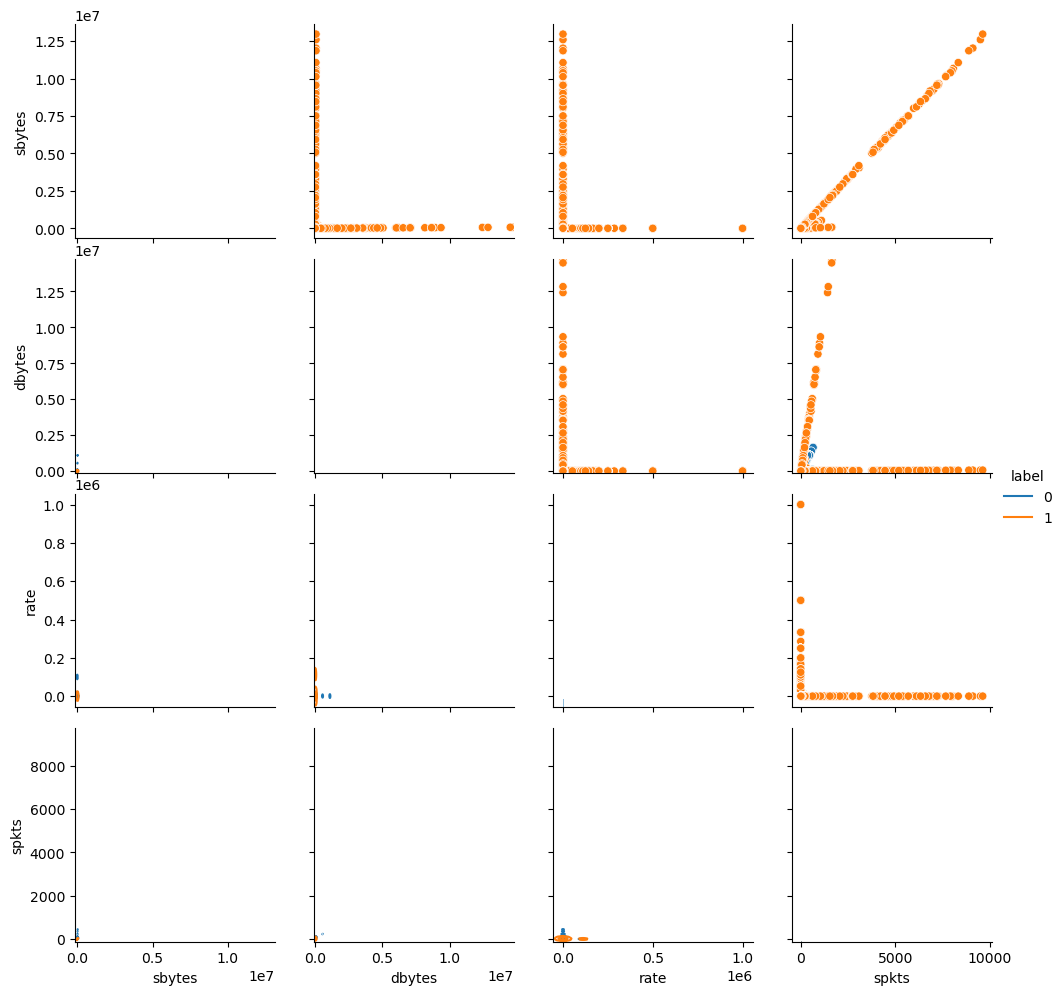

In [77]:
import warnings
warnings.filterwarnings("ignore") 

# Pair grid plot for selected features
selected_features = ['sbytes', 'dbytes', 'rate', 'spkts', 'label']

# Creating the pair grid with only scatterplot on upper and kdeplot on lower
g = sns.PairGrid(training_df[selected_features], hue="label")
g.map_upper(sns.scatterplot)  # Upper triangle scatter plots
g.map_lower(sns.kdeplot)  # Lower triangle density plot
g.map_diag(sns.histplot, kde=False)  # Diagonal histograms without KDE
g.add_legend()

plt.show()

# Model Development:

* Split the dataset into training and testing sets.
* Develop multiple machine learning models for intrusion detection, such as: 
    * Decision Trees
    * Random Forests
    * Support Vector Machines (SVM)
    * Neural Networks
* Use Python libraries such as Scikit-learn, TensorFlow, or PyTorch.

## Import Required Libraries

In [34]:
# Import multiple library
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Prepare Data for Model Development

In [37]:
# Features X and target y are separated
X = training_df.drop(columns=['label', 'attack_cat'])  # Drop target columns
y = training_df['label']  # Binary target: 0 (normal), 1 (attack)

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['category', 'object']).columns

# Apply Label Encoding to all categorical columns
label_encoders = {}  # To store label encoders for future use
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Transform categorical to numeric
    label_encoders[col] = le  # Save the encoder for inverse transformation if needed

# Ensure all data types are numeric
X = X.apply(pd.to_numeric)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Print shapes of training and testing sets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (67775, 36)
Testing set shape: (29047, 36)


## Decision Tree Classifier

Decision Tree Model Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     14668
           1       0.91      0.90      0.90     14379

    accuracy                           0.90     29047
   macro avg       0.90      0.90      0.90     29047
weighted avg       0.90      0.90      0.90     29047



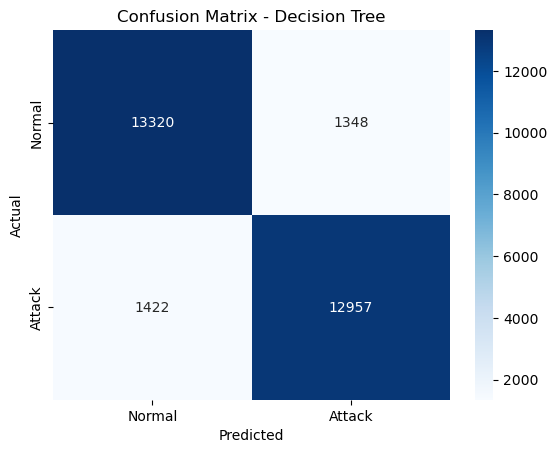

In [58]:
# Train the model Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Prediction on test set for prediction
y_pred_dt = dt_model.predict(X_test)

# Confusion Matrix Decision Tree Model
print("Decision Tree Model Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Random Forest Model

Random Forest Model Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     14668
           1       0.91      0.94      0.92     14379

    accuracy                           0.92     29047
   macro avg       0.92      0.92      0.92     29047
weighted avg       0.92      0.92      0.92     29047



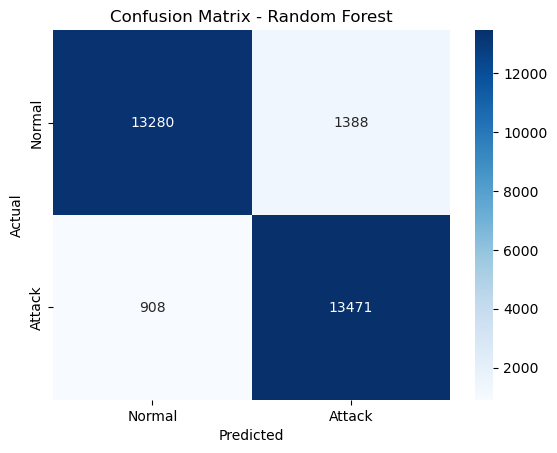

In [60]:
# Train the model Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Prediction on the test set
y_pred_rf = rf_model.predict(X_test)

# Confusion Matrix Report for Random Forest Model
print("Random Forest Model Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Support Vector Machine (SVM)

SVM Model Report:
              precision    recall  f1-score   support

           0       0.99      0.26      0.42     14668
           1       0.57      1.00      0.73     14379

    accuracy                           0.63     29047
   macro avg       0.78      0.63      0.57     29047
weighted avg       0.78      0.63      0.57     29047



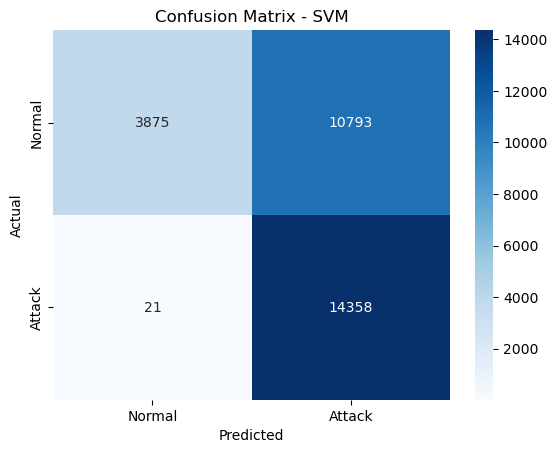

In [41]:
# Train SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Prediction on test set
y_pred_svm = svm_model.predict(X_test)

# Classification Report SVM Model
print("SVM Model Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Neural Network MLP Classifier

Neural Network (MLP) Model Report:
              precision    recall  f1-score   support

           0       0.98      0.73      0.84     14668
           1       0.78      0.99      0.87     14379

    accuracy                           0.86     29047
   macro avg       0.88      0.86      0.85     29047
weighted avg       0.88      0.86      0.85     29047



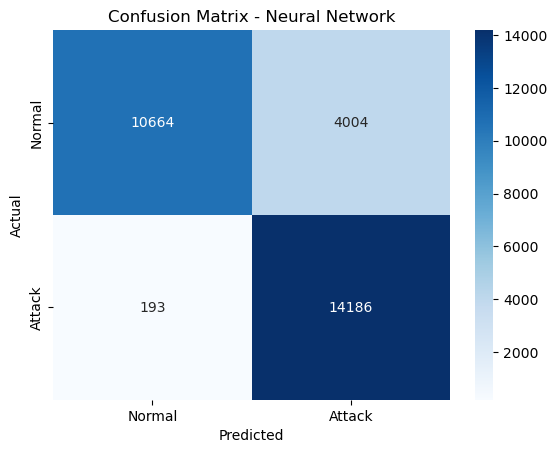

In [43]:
# Train Neural Network on the MLP Classifier
mlp_model = MLPClassifier(random_state=42, hidden_layer_sizes=(50, 25), max_iter=300)
mlp_model.fit(X_train, y_train)

# Prediction on test set
y_pred_mlp = mlp_model.predict(X_test)

# Classification Report Neural Network Model
print("Neural Network (MLP) Model Report:")
print(classification_report(y_test, y_pred_mlp))

# Confusion Matrix with Normal and Attack in y axis
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Model Evaluation 

* Evaluate the models using metrics such as accuracy precision recall f1 score and ROC-AUC.
* Perform cross-validation to ensure the robustness  of the models

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

## Function for all model evaluation

In [60]:
# Function to calculate the evaluation of a model
def evaluate_model(model, X_test, y_test, model_name):
    # Prediction on test data
    y_pred = model.predict(X_test)
    
    # Compute the all metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None
    
    # Print the all evaluation result
    print(model_name + " Evaluation Metrics:")
    print("Accuracy: " + str(round(accuracy, 4)))
    print("Precision: " + str(round(precision, 4)))
    print("Recall: " + str(round(recall, 4)))
    print("F1 Score: " + str(round(f1, 4)))
    if roc_auc is not None:
        print("ROC-AUC: " + str(round(roc_auc, 4)))
    
    # Plot ROC Curve
    if roc_auc is not None:
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=model_name + " (AUC = " + str(round(roc_auc, 4)) + ")")
        plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
        # ROC Curve Main Title
        plt.title("ROC Curve - " + model_name)
        # X label title
        plt.xlabel("False Positive Rate")
        # Y label title
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()

## Evaluate the all models by using above function

Decision Tree Evaluation Metrics:
Accuracy: 0.9046
Precision: 0.9058
Recall: 0.9011
F1 Score: 0.9034
ROC-AUC: 0.9056


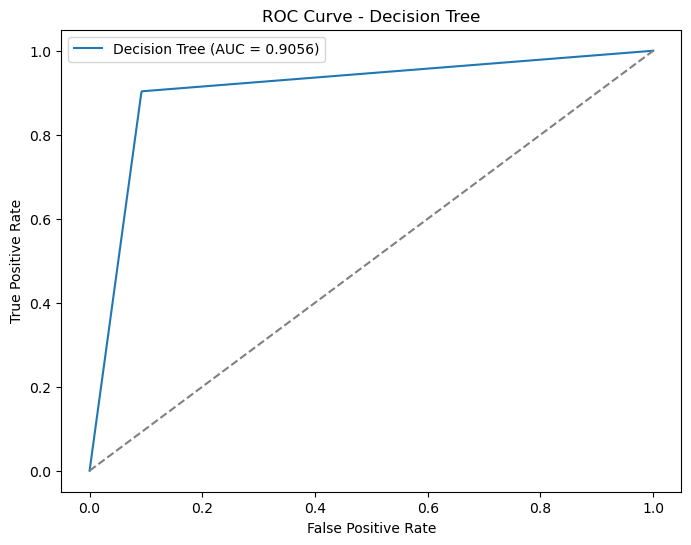

Random Forest Evaluation Metrics:
Accuracy: 0.921
Precision: 0.9066
Recall: 0.9369
F1 Score: 0.9215
ROC-AUC: 0.9819


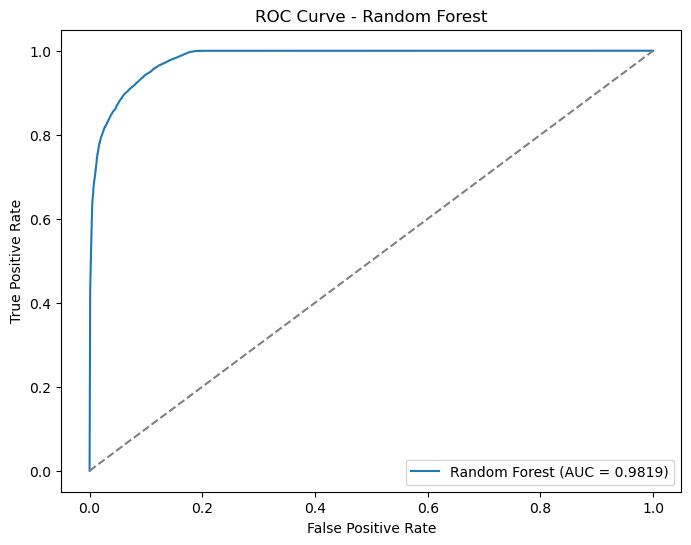

SVM ROC-AUC: 0.8238


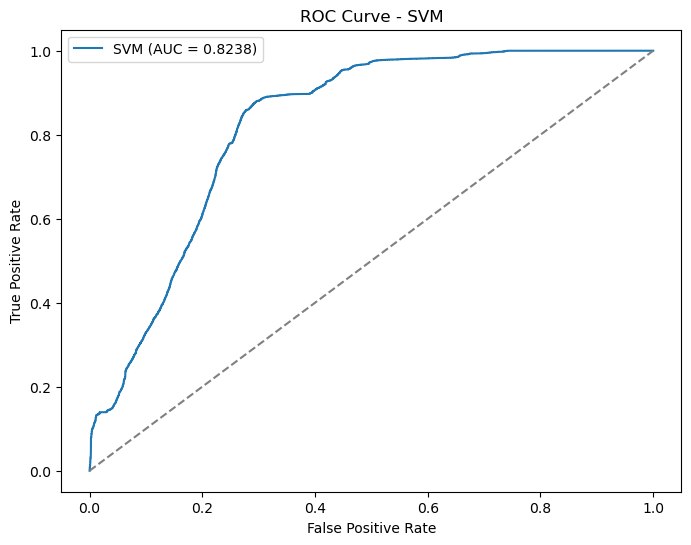

Neural Network Evaluation Metrics:
Accuracy: 0.8555
Precision: 0.7799
Recall: 0.9866
F1 Score: 0.8711
ROC-AUC: 0.8931


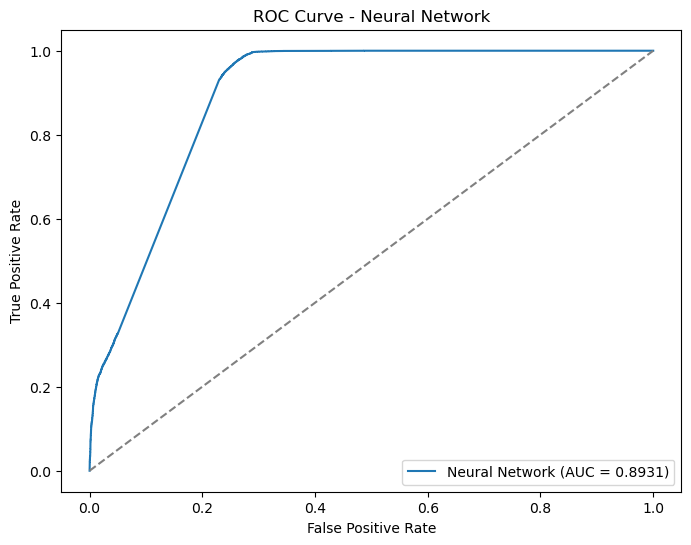

In [65]:
# Evaluate the Decision Tree model
evaluate_model(dt_model, X_test, y_test, "Decision Tree")

# Evaluate the Random Forest model
evaluate_model(rf_model, X_test, y_test, "Random Forest")

# Evaluate SVM model SVM does not provide predict_proba by the default
if hasattr(svm_model, "decision_function"):
    y_pred_svm = svm_model.decision_function(X_test)
    roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
    print("SVM ROC-AUC: " + str(round(roc_auc_svm, 4)))
    fpr, tpr, _ = roc_curve(y_test, y_pred_svm)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label="SVM (AUC = " + str(round(roc_auc_svm, 4)) + ")")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    # Print the main title
    plt.title("ROC Curve - " + "SVM")
    # print the x label
    plt.xlabel("False Positive Rate")
    # print the y label
    plt.ylabel("True Positive Rate")
    # print the legend
    plt.legend()
    plt.show()
else:
    print("SVM does not support predict_proba. Skipping ROC-AUC evaluation.")

# Evaluate the last model neural network
evaluate_model(mlp_model, X_test, y_test, "Neural Network")

## Perform The Cross Validation

In [68]:
# Function for the cross validation
def cross_validate_model(model, X, y, model_name, cv=5):
    print("Cross-Validation Scores for " + model_name + ":")
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
    print("Scores: " + str(cv_scores))
    # print the mean accuracy
    print("Mean Accuracy: " + str(round(cv_scores.mean(), 4)))
    # print the standard deviation
    print("Standard Deviation: " + str(round(cv_scores.std(), 4)))
    print("\n")

# Cross Validation for Decision Tree
cross_validate_model(dt_model, X, y, "Decision Tree")

# Cross Validation for Random Forest
cross_validate_model(rf_model, X, y, "Random Forest")

# Cross Validation for SVM
cross_validate_model(svm_model, X, y, "SVM")

# Cross Validation for Neural Network
cross_validate_model(mlp_model, X, y, "Neural Network")

Cross-Validation Scores for Decision Tree:
Scores: [0.897134   0.93787761 0.93756455 0.93673828 0.56930386]
Mean Accuracy: 0.8557
Standard Deviation: 0.1441


Cross-Validation Scores for Random Forest:
Scores: [0.91959721 0.95522851 0.95600083 0.9531605  0.53088205]
Mean Accuracy: 0.863
Standard Deviation: 0.1666


Cross-Validation Scores for SVM:
Scores: [0.62912471 0.67900852 0.68265854 0.66174344 0.49375129]
Mean Accuracy: 0.6293
Standard Deviation: 0.0703


Cross-Validation Scores for Neural Network:
Scores: [0.73684482 0.81611154 0.80417269 0.78227639 0.4508366 ]
Mean Accuracy: 0.718
Standard Deviation: 0.1363




# Hyperparameter tuning 

* Use techniques such as Grid Search or Random Search to optimize the Hyperparameters of the models.

In [39]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Decision Tree Hyperparameter Tuning with Grid Search

In [75]:
# Define parameter grid for Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform the Grid Search on the model
dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=dt_param_grid,
                              scoring='accuracy',
                              cv=5,
                              verbose=1,
                              n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy for the decision tree after hyperparameter tuning
print("Best Parameters for Decision Tree:")
print(dt_grid_search.best_params_)
print("Best Cross-Validation Accuracy: " + str(round(dt_grid_search.best_score_, 4)))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters for Decision Tree:
{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.9088


## Random Forest Hyperparameter Tuning with Random Search

In [49]:
# Parameter grid for Random Forest
rf_param_grid_optimized = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Perform Random Search with fewer iteration and reduced parameter grid than
rf_random_search_optimized = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_param_grid_optimized,
    # Reduced number of parameter combination
    n_iter=10,  
    scoring='accuracy',
    # Reduced cross validation folds
    cv=3,  
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# fitting the data in it 
rf_random_search_optimized.fit(X_train, y_train)

# Print the best parameter and accuracy after random search
print("Best Parameters for Random Forest (Optimized):")
print(rf_random_search_optimized.best_params_)
print("Best Cross-Validation Accuracy (Optimized): " + str(round(rf_random_search_optimized.best_score_, 4)))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Random Forest (Optimized):
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Best Cross-Validation Accuracy (Optimized): 0.9212


## Support Vector Machine Hyperparameter Tuning with Grid Search

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Pipeline with scaling
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=42))
])

# Parameter grid
svm_param_grid = {
    'svc__C': [1, 10],
    # Linear Kernel
    'svc__kernel': ['linear']  
}

# Perform Randomize Search with limit fold
svm_random_search = RandomizedSearchCV(
    estimator=svm_pipeline,
    param_distributions=svm_param_grid,
    scoring='accuracy',
    cv=2,  
    n_iter=2,  
    verbose=1,
    # Use single core to prevent freezing
    n_jobs=1  
)

# Use a subset of data for quick testing 
X_train_subset = X_train.sample(25000) if len(X_train) > 25000 else X_train
y_train_subset = y_train.loc[X_train_subset.index]

# Fit the model
svm_random_search.fit(X_train_subset, y_train_subset)

# Print result
print("Best Parameters for SVM:")
print(svm_random_search.best_params_)
print("Best Cross-Validation Accuracy: " + str(round(svm_random_search.best_score_, 4)))

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best Parameters for SVM:
{'svc__kernel': 'linear', 'svc__C': 1}
Best Cross-Validation Accuracy: 0.8667


## Neural Network Hyperparameter Tuning with Grid Search

In [43]:
# Parameter grid for Neural Network
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],  
    # Most commonly use activation
    'activation': ['relu'],  
    # Effective solver
    'solver': ['adam'],  
    'alpha': [0.0001, 0.001], 
    # Single learning rate
    'learning_rate': ['adaptive']  
}

# Perform Grid Search on Neural network
# iteration is 300 and state is random 
mlp_grid_search = GridSearchCV(estimator=MLPClassifier(max_iter=300, random_state=42),
                               param_grid=mlp_param_grid,
                               scoring='accuracy',
                               cv=3,  
                               verbose=1,
                               n_jobs=-1)
mlp_grid_search.fit(X_train, y_train)

# Print the best parameter and accuracy
print("Best Parameters for Neural Network:")
print(mlp_grid_search.best_params_)
print("Best Cross-Validation Accuracy: " + str(round(mlp_grid_search.best_score_, 4)))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters for Neural Network:
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best Cross-Validation Accuracy: 0.8363


## Model Performance Visualization (Accuracy, Precision, Recall, F1-Score)

In [82]:
# Model names
models = ['Decision Tree', 'Random Forest', 'SVM', 'Neural Network']

# Model performance metrics
accuracy = [0.9046, 0.921, 0.6300, 0.8555]
precision = [0.9058, 0.9066, 0.7800, 0.7799]
recall = [0.9011, 0.9369, 0.9900, 0.9866]
f1_score = [0.9034, 0.9215, 0.5700, 0.8711]

# Metrics and corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1_score]

# Save all figures
fig_paths = []
for i, metric in enumerate(metrics):
    plt.figure(figsize=(8, 6))
    plt.bar(models, values[i], color=['pink', 'red', 'orange', 'yellow'])
    plt.title('Model Comparison: ' + metric)
    plt.ylabel(metric)
    plt.xlabel('Models')
    plt.ylim(0, 1)
    file_name = f"model_comparison_{metric.lower()}.png"
    plt.savefig(file_name)
    fig_paths.append(file_name)
     # Close the figure after saving
    plt.close() 

fig_paths

['model_comparison_accuracy.png',
 'model_comparison_precision.png',
 'model_comparison_recall.png',
 'model_comparison_f1 score.png']

## Feature Importance for Decision Tree and Random Forest

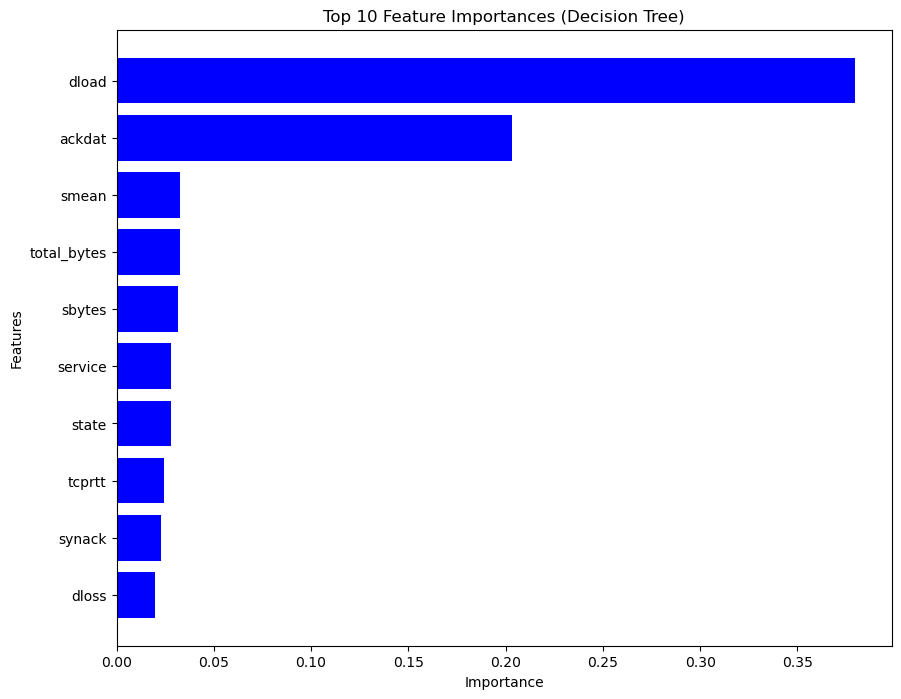

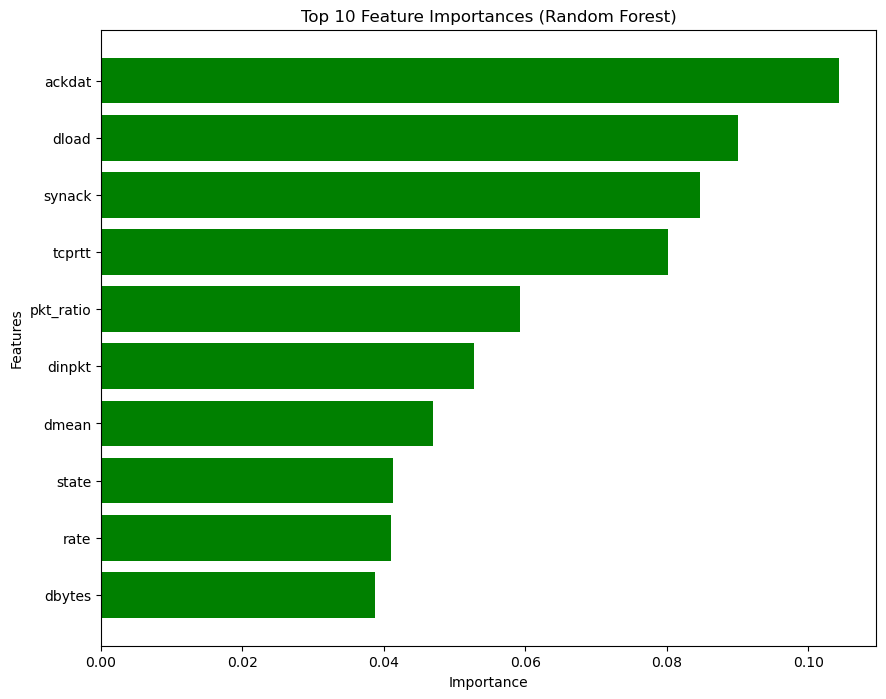

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature Importance for Decision Tree
dt_feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot Decision Tree Feature Importance
plt.figure(figsize=(10, 8))
plt.barh(dt_feature_importances['Feature'][:10], dt_feature_importances['Importance'][:10], color='blue')
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.savefig("feature_importance_decision_tree.png")
plt.show()

# Feature Importance for Random Forest
rf_feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot Random Forest Feature Importance
plt.figure(figsize=(10, 8))
plt.barh(rf_feature_importances['Feature'][:10], rf_feature_importances['Importance'][:10], color='green')
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.savefig("feature_importance_random_forest.png")
plt.show()

## Feature Importance for SVM and Neural Network Using Permutation Importance 2500 samples

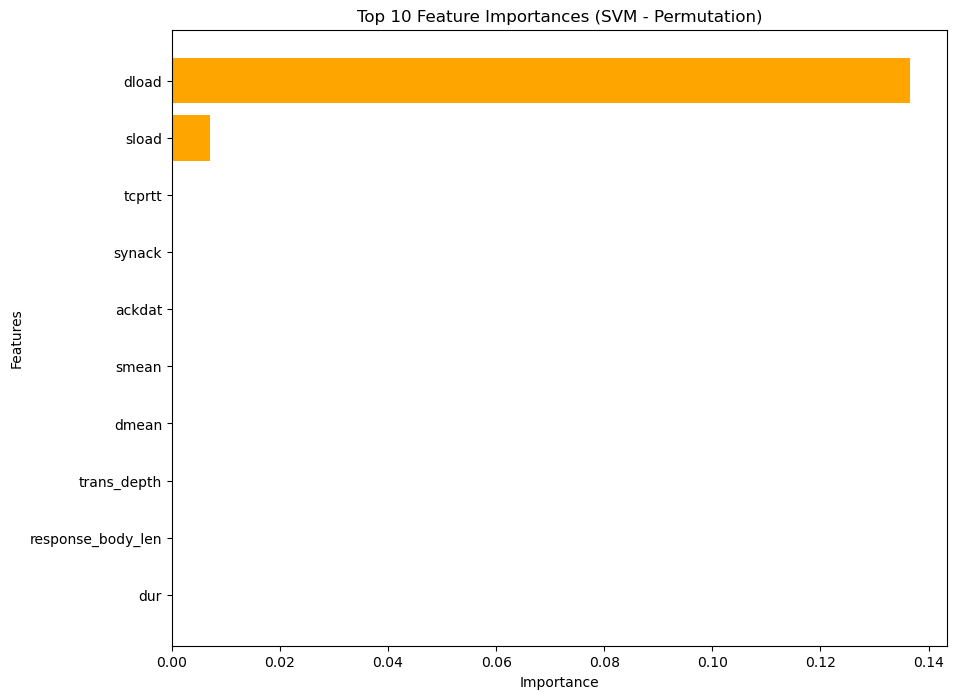

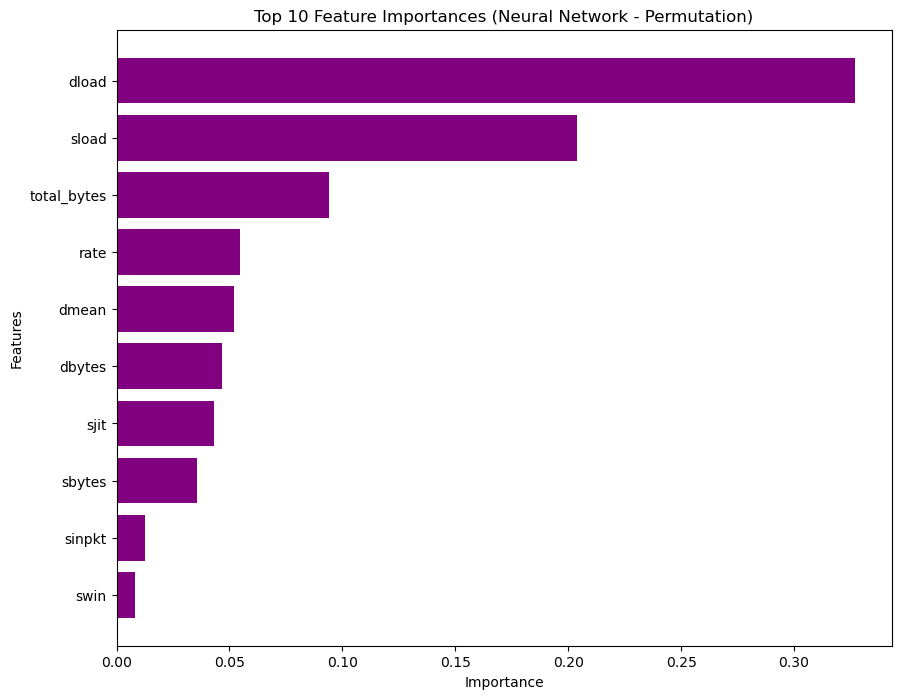

In [45]:
from sklearn.inspection import permutation_importance

# Sample test data to 2500 rows 
X_test_sample = X_test.sample(n=2500, random_state=42)
y_test_sample = y_test.loc[X_test_sample.index]

# n_repeats 3
n_repeats = 3

# Permutation Importance for SVM
svm_importance = permutation_importance(svm_model, X_test_sample, y_test_sample, scoring='accuracy', n_repeats=n_repeats, random_state=42)

# DataFrame for SVM
svm_importances_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': svm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot Permutation Importance for SVM
plt.figure(figsize=(10, 8))
plt.barh(svm_importances_df['Feature'][:10], svm_importances_df['Importance'][:10], color='orange')
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances (SVM - Permutation)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.savefig("feature_importance_svm.png")
plt.show()

# Permutation Importance for Neural Network
mlp_importance = permutation_importance(mlp_model, X_test_sample, y_test_sample, scoring='accuracy', n_repeats=n_repeats, random_state=42)

# DataFrame for Neural Network
mlp_importances_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': mlp_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot Permutation Importance for Neural Network
plt.figure(figsize=(10, 8))
plt.barh(mlp_importances_df['Feature'][:10], mlp_importances_df['Importance'][:10], color='purple')
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances (Neural Network - Permutation)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.savefig("feature_importance_mlp.png")
plt.show()